# 코알라 해커톤

글로우픽 사이트에서 파운데이션 정보를 수집하여 상관관계를 알아보는 데이터 분석

In [174]:
# 데이터 불러오기
import pandas as pd
import numpy as np


df = pd.read_csv('glowpick_data2.csv', thousands = ',')
df.head(10)

,name,brand,volume,price,score,ing_green,ing_orange,ing_red,tag
0,레이어드 커버 파운데이션 [SPF35/PA++],네이밍 (NAMING),30ml,29000,4.39,32,13,1,"['결보정', '리퀴드타입', '미백증진', '자외선차단', '주름개선', '피부톤..."
1,인텐시브 스킨 세럼 파운데이션 [SPF40/PA+++],바비브라운 (BOBBI BROWN),30ml,85000,4.28,32,14,0,"['리퀴드타입', '윤기부여', '자외선차단', '피부톤보정']"
2,윙크 파운데이션 팩트 [SPF50+/PA+++],자빈드서울 (JAVIN DE SEOUL),13.5g,28000,4.21,41,10,2,"['미백증진', '수분공급', '자외선차단', '주름개선', '쿠션타입']"
3,자생 퍼펙트 쿠션 [SPF50+/PA++++],동인비 (DONGINBI),15g*2,55000,4.20,41,10,4,"['미백증진', '영양공급', '윤기부여', '주름개선', '쿠션타입']"
4,네오 쿠션 매트 [SPF40/PA++],라네즈 (LANEIGE),15g,25000,4.23,25,10,3,['쿠션타입']
5,퍼펙팅 파운데이션 [SPF17/PA+],설화수 (Sulwhasoo),35ml,70000,4.28,34,13,3,"['리퀴드타입', '수분공급', '윤기부여', '자외선차단', '피부톤보정']"
6,매트 벨벳 스킨 블러링 파우더 파운데이션,메이크업포에버 (MAKE UP FOR EVER),11g,60000,4.23,16,5,0,"['컴팩트타입', '피부톤보정']"
7,아우라 워터 글로우 쿠션 [SPF50+/PA+++],룩스앤메이 (LOOKS & MEII),15g*2,45000,4.20,50,13,3,"['미백증진', '수분공급', '자외선차단', '주름개선', '쿠션타입']"
8,플로리스 뤼미에르 래디언스-퍼펙팅 쿠션 [SPF50/PA+++],로라메르시에 (LAURA MERCIER),15g,69000,4.13,42,7,0,"['스펀지타입', '자외선차단', '파데쿠션']"
9,퓨처리스트 아쿠아 브릴리언스 파운데이션 [SPF20/PA+++],에스티 로더 (ESTEE LAUDER),30ml,88000,4.12,46,12,0,"['리퀴드타입', '수분공급', '자외선차단', '피부진정', '피부톤보정']"


In [175]:
df.describe()
def remove_ml(x):
     return x.replace('ml', '')
def remove_g(x):
     return x.replace('g', '')
     
#g, ml 지우고 형변환

df['volume'] = df['volume'].apply(remove_ml)
df['volume'] = df['volume'].apply(remove_g)

# 2개입 항목 확인
df['volume'].value_counts()

# 2개입 수량 맞추기
df['volume'] = df['volume'].apply(remove_ml)
df['volume'] = df['volume'].apply(remove_g)
df.loc[ df['volume'] == '15*2'] = 30
df.loc[ df['volume'] == '14*2'] = 28
df.loc[ df['volume'] == '13*2'] = 26
df.loc[ df['volume'] == '12.5*2'] = 25
df.loc[ df['volume'] == '12*2'] = 24
df.loc[ df['volume'] == '13*2ea'] = 26
df.loc[ df['volume'] == '0.3*8'] = 2.4

df['volume'] = pd.to_numeric(df['volume'])
df['price'] = pd.to_numeric(df['price'])


df.head(20)

,name,brand,volume,price,score,ing_green,ing_orange,ing_red,tag
0,레이어드 커버 파운데이션 [SPF35/PA++],네이밍 (NAMING),30.0,29000.0,4.39,32.0,13.0,1.0,"['결보정', '리퀴드타입', '미백증진', '자외선차단', '주름개선', '피부톤..."
1,인텐시브 스킨 세럼 파운데이션 [SPF40/PA+++],바비브라운 (BOBBI BROWN),30.0,85000.0,4.28,32.0,14.0,0.0,"['리퀴드타입', '윤기부여', '자외선차단', '피부톤보정']"
2,윙크 파운데이션 팩트 [SPF50+/PA+++],자빈드서울 (JAVIN DE SEOUL),13.5,28000.0,4.21,41.0,10.0,2.0,"['미백증진', '수분공급', '자외선차단', '주름개선', '쿠션타입']"
3,30,30,30.0,30.0,30.00,30.0,30.0,30.0,30
4,네오 쿠션 매트 [SPF40/PA++],라네즈 (LANEIGE),15.0,25000.0,4.23,25.0,10.0,3.0,['쿠션타입']
5,퍼펙팅 파운데이션 [SPF17/PA+],설화수 (Sulwhasoo),35.0,70000.0,4.28,34.0,13.0,3.0,"['리퀴드타입', '수분공급', '윤기부여', '자외선차단', '피부톤보정']"
6,매트 벨벳 스킨 블러링 파우더 파운데이션,메이크업포에버 (MAKE UP FOR EVER),11.0,60000.0,4.23,16.0,5.0,0.0,"['컴팩트타입', '피부톤보정']"
7,30,30,30.0,30.0,30.00,30.0,30.0,30.0,30
8,플로리스 뤼미에르 래디언스-퍼펙팅 쿠션 [SPF50/PA+++],로라메르시에 (LAURA MERCIER),15.0,69000.0,4.13,42.0,7.0,0.0,"['스펀지타입', '자외선차단', '파데쿠션']"
9,퓨처리스트 아쿠아 브릴리언스 파운데이션 [SPF20/PA+++],에스티 로더 (ESTEE LAUDER),30.0,88000.0,4.12,46.0,12.0,0.0,"['리퀴드타입', '수분공급', '자외선차단', '피부진정', '피부톤보정']"


In [176]:
#용량당 가격 열 만들기

df['price/volume'] = df['price'] / df['volume']

df.head()

,name,brand,volume,price,score,ing_green,ing_orange,ing_red,tag,price/volume
0,레이어드 커버 파운데이션 [SPF35/PA++],네이밍 (NAMING),30.0,29000.0,4.39,32.0,13.0,1.0,"['결보정', '리퀴드타입', '미백증진', '자외선차단', '주름개선', '피부톤...",966.666667
1,인텐시브 스킨 세럼 파운데이션 [SPF40/PA+++],바비브라운 (BOBBI BROWN),30.0,85000.0,4.28,32.0,14.0,0.0,"['리퀴드타입', '윤기부여', '자외선차단', '피부톤보정']",2833.333333
2,윙크 파운데이션 팩트 [SPF50+/PA+++],자빈드서울 (JAVIN DE SEOUL),13.5,28000.0,4.21,41.0,10.0,2.0,"['미백증진', '수분공급', '자외선차단', '주름개선', '쿠션타입']",2074.074074
3,30,30,30.0,30.0,30.00,30.0,30.0,30.0,30,1.000000
4,네오 쿠션 매트 [SPF40/PA++],라네즈 (LANEIGE),15.0,25000.0,4.23,25.0,10.0,3.0,['쿠션타입'],1666.666667


In [177]:
#랭킹 열 만들기
num = list(range(1, 101))
num
df['rank'] = num
df.head()

,name,brand,volume,price,score,ing_green,ing_orange,ing_red,tag,price/volume,rank
0,레이어드 커버 파운데이션 [SPF35/PA++],네이밍 (NAMING),30.0,29000.0,4.39,32.0,13.0,1.0,"['결보정', '리퀴드타입', '미백증진', '자외선차단', '주름개선', '피부톤...",966.666667,1
1,인텐시브 스킨 세럼 파운데이션 [SPF40/PA+++],바비브라운 (BOBBI BROWN),30.0,85000.0,4.28,32.0,14.0,0.0,"['리퀴드타입', '윤기부여', '자외선차단', '피부톤보정']",2833.333333,2
2,윙크 파운데이션 팩트 [SPF50+/PA+++],자빈드서울 (JAVIN DE SEOUL),13.5,28000.0,4.21,41.0,10.0,2.0,"['미백증진', '수분공급', '자외선차단', '주름개선', '쿠션타입']",2074.074074,3
3,30,30,30.0,30.0,30.00,30.0,30.0,30.0,30,1.000000,4
4,네오 쿠션 매트 [SPF40/PA++],라네즈 (LANEIGE),15.0,25000.0,4.23,25.0,10.0,3.0,['쿠션타입'],1666.666667,5


In [178]:

from pandas import DataFrame 

df = DataFrame(df)

df.head()

,name,brand,volume,price,score,ing_green,ing_orange,ing_red,tag,price/volume,rank
0,레이어드 커버 파운데이션 [SPF35/PA++],네이밍 (NAMING),30.0,29000.0,4.39,32.0,13.0,1.0,"['결보정', '리퀴드타입', '미백증진', '자외선차단', '주름개선', '피부톤...",966.666667,1
1,인텐시브 스킨 세럼 파운데이션 [SPF40/PA+++],바비브라운 (BOBBI BROWN),30.0,85000.0,4.28,32.0,14.0,0.0,"['리퀴드타입', '윤기부여', '자외선차단', '피부톤보정']",2833.333333,2
2,윙크 파운데이션 팩트 [SPF50+/PA+++],자빈드서울 (JAVIN DE SEOUL),13.5,28000.0,4.21,41.0,10.0,2.0,"['미백증진', '수분공급', '자외선차단', '주름개선', '쿠션타입']",2074.074074,3
3,30,30,30.0,30.0,30.00,30.0,30.0,30.0,30,1.000000,4
4,네오 쿠션 매트 [SPF40/PA++],라네즈 (LANEIGE),15.0,25000.0,4.23,25.0,10.0,3.0,['쿠션타입'],1666.666667,5


In [179]:
#필요없는 열 지우기
df = df.drop(['name','brand','volume','price','tag' ], axis=1)

df.head()

,score,ing_green,ing_orange,ing_red,price/volume,rank
0,4.39,32.0,13.0,1.0,966.666667,1
1,4.28,32.0,14.0,0.0,2833.333333,2
2,4.21,41.0,10.0,2.0,2074.074074,3
3,30.00,30.0,30.0,30.0,1.000000,4
4,4.23,25.0,10.0,3.0,1666.666667,5


In [180]:
# 성분 가중치
#df['ing_all'] = df['ing_green'] + df['ing_orange'] + df['ing_red']

#df.head()

#df['ing'] = -1*(df['ing_green']/df['ing_all']) + -2*(df['ing_orange']/df['ing_all']) + -3*(df['ing_red']/df['ing_all'])
#df['ing'] =  -1*(df['ing_orange']) + -2*(df['ing_red'])

df.head()

#필요없는 열 지우기
#df = df.drop(['ing_green','ing_orange','ing_red','ing_all' ], axis=1)

#df.head()

,score,ing_green,ing_orange,ing_red,price/volume,rank
0,4.39,32.0,13.0,1.0,966.666667,1
1,4.28,32.0,14.0,0.0,2833.333333,2
2,4.21,41.0,10.0,2.0,2074.074074,3
3,30.00,30.0,30.0,30.0,1.000000,4
4,4.23,25.0,10.0,3.0,1666.666667,5


In [181]:
#df['ing'] = pd.to_numeric(df['ing'])

#df.head()
#type(df['score'])

In [182]:
input_data = df.drop('rank', axis=1)
target_data = df['rank']

input_data
target_data
print(input_data.shape, target_data.shape)

(100, 5) (100,)


# 학습

--------------------

# 랜덤 포레스트

In [194]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

In [195]:
 #모델링 학습: Random Forest
    
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [196]:
print('train set accuracy:', forest.score(x_train, y_train))

train set accuracy: 0.7384243082945028


In [197]:
# 모델검증

print('test set accuracy:', forest.score(x_test,y_test))

test set accuracy: 0.5633080223830098


In [187]:
y_predict = forest.predict(x_test)
comparison = pd.DataFrame(y_test)
comparison['내 추측'] = y_predict

comparison

,rank,내 추측
27,28,34.316667
34,35,61.550000
32,33,84.140000
18,19,24.314286
14,15,18.580000
7,8,59.271134
88,89,85.350000
85,86,76.120000
4,5,43.916000
50,51,58.130000


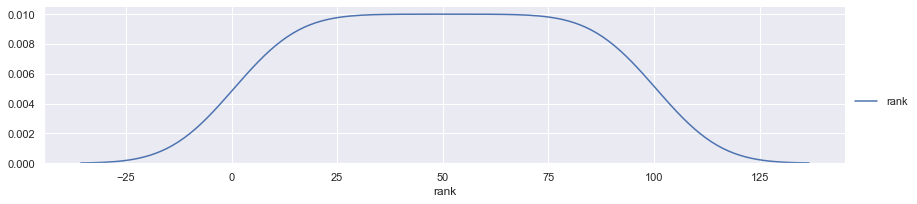

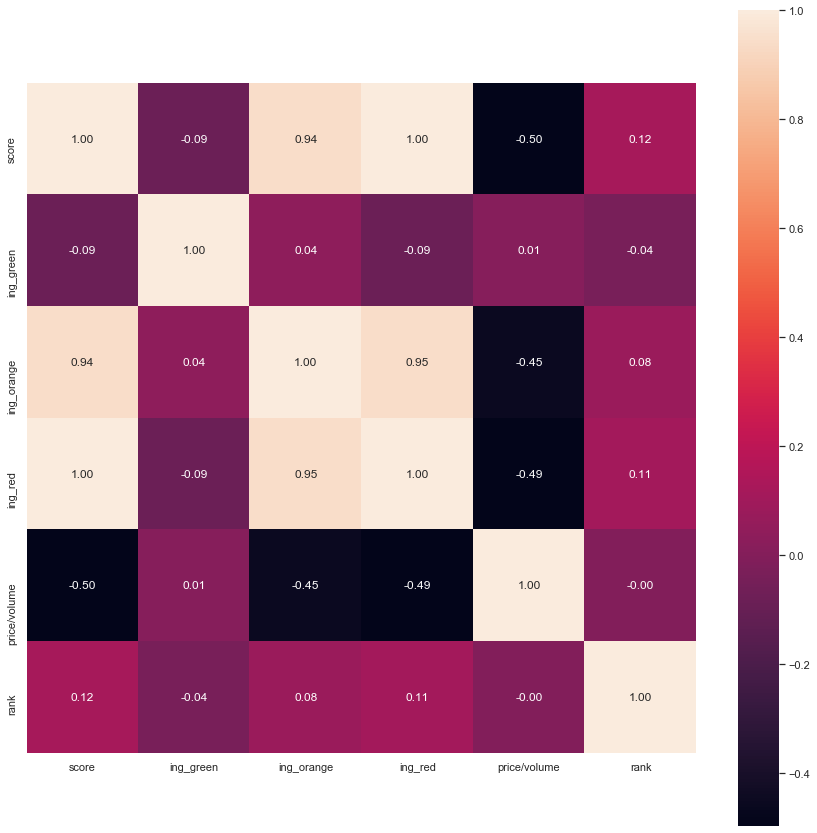

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


facet = sns.FacetGrid(df, aspect=4)
facet.map(sns.kdeplot, 'rank')
facet.add_legend()

plt.show()


plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)

plt.show()

----------------------
# linearregression

In [198]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

print("train set score:", lr.score(x_train, y_train))
print("valid set score:", lr.score(x_test, y_test))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                      LinearRegression()).fit(x_train, y_train)

print("train set score:", model.score(x_train, y_train))
print("valid set score:", model.score(x_test, y_test))
model.predict(x_train)

my_data = pd.Series({
    "score" : 4,
# "ing_green": 30,
# "ing_orange":12,
# "ing_red": 1,
"price/volume" : 1000
    
})


train set score: 0.019088234396715698
valid set score: -0.020395948376858763
train set score: 0.5505984892661162
valid set score: 0.2375857854177078
